# Orion Tulog

This is a tutorial for anomaly detection using Orion. Orion is a `python` package for time series anoamly detection. It provides a suite of both statistical and machine learning models that enable efficient anomaly detection.

In this tutorial, we will learn how to set up Orion, train a machine learning model, and perform anomaly detection. We will delve into each part seperately and then run the evaluation pipeline from beginning to end in order to compare multiple models against each other.

In [1]:
# general imports 

from utils import plot

## Part 1
In part one of the series, we explore a time series data, particularly the NYC taxi data. You can find the raw data on the [TLC](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) or the processed version maintained by Numenta [here](https://github.com/numenta/NAB/tree/master/data). We also explore what reasons could possibily be contributing to producing such anomalies.

### Data Loading
There is a collection of data already available in Orion, to load them, we use the `load_signal` function and pass the name of the signal we wish to obtain. Similarly, since this data is labeled, we use the `load_anomalies` function to get the corresponding anomaly of the signal

In [2]:
from orion.data import load_signal, load_anomalies

signal = 'nyc_taxi'

# load signal
df = load_signal(signal)

# load ground truth anomalies
known_anomalies = load_anomalies(signal)

df.head(5)

,timestamp,value
0,1404165600,10844.0
1,1404167400,8127.0
2,1404169200,6210.0
3,1404171000,4656.0
4,1404172800,3820.0


The data is automatically loaded from the repo, but you can also pass the `file_path` (the location of the data) to the `load_signal` function to load your own data.

Similarly, in this setting, we know the ground truth labels (`known_anomalies`) they are defined by start timestamp and end timestamp. This particular signal has five anomalies. According to the data source, the anomalies are, in order of sequence, due to:
1. NYC marathon
2. Thanksgiving
3. Christmas
4. New years
5. Snow storm

In [3]:
known_anomalies

,start,end
0,1414679400,1415050200
1,1416913200,1417284000
2,1419330600,1419701400
3,1419885000,1420255800
4,1422127800,1422498600


To properly view the anomalies, let's go ahead and plot them. We can use the helper function `plot` that takes a time series data (or multiple) and anomalies (or multiple) and plots the signal with highlighted anomalous regions.

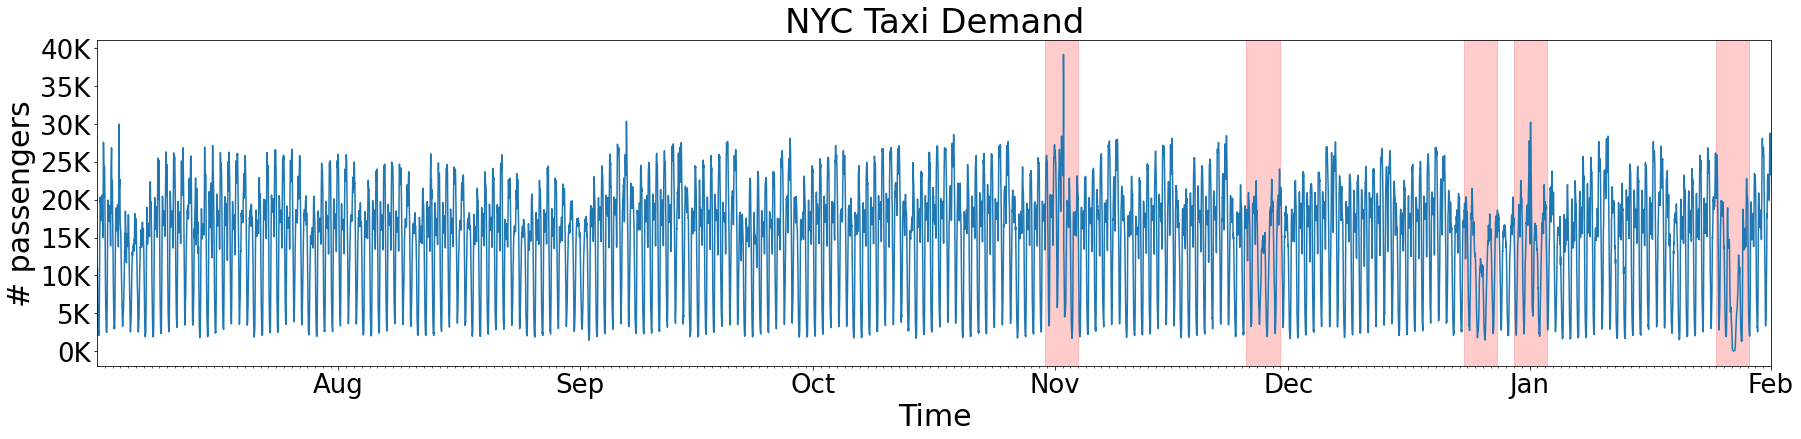

In [4]:
# plotting the data

plot(df, known_anomalies)

---